### Q1 
### Name:Pranav
### Reg no:2347137

### Scenario:
The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.

### Lab Task:
 Attempt to implement a Single Layer Perceptron in Google Colab to classify the
output of an XOR gate. Perform the following steps:

Create the XOR gate's truth table dataset.

In [17]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# XOR gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.

In [18]:
class SLPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activate(self, x):
        return np.where(x > 0, 1, 0)

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activate(summation)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

# Train SLP
slp = SLPerceptron(input_size=2)
slp.train(X, y)

# Evaluate SLP
print("Single Layer Perceptron Results:")
for inputs, label in zip(X, y):
    prediction = slp.predict(inputs)
    print(f"Input: {inputs}, Target: {label}, Prediction: {prediction}")

Single Layer Perceptron Results:
Input: [0 0], Target: 0, Prediction: 1
Input: [0 1], Target: 1, Prediction: 1
Input: [1 0], Target: 1, Prediction: 0
Input: [1 1], Target: 0, Prediction: 1


Observe and discuss the perceptron's performance in this scenario.

The single-layer perceptron will not be able to classify the XOR gate correctly because it is linearly inseparable. Most of the predictions will be wrong.



Implement XOR using Multi-Layer Perceptron.

In [19]:
# Multi-Layer Perceptron implementation using sklearn
mlp = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000)
mlp.fit(X, y)

# Evaluate MLP
print("\nMulti-Layer Perceptron Results:")
predictions = mlp.predict(X)
for inputs, label, prediction in zip(X, y, predictions):
    print(f"Input: {inputs}, Target: {label}, Prediction: {prediction}")


Multi-Layer Perceptron Results:
Input: [0 0], Target: 0, Prediction: 0
Input: [0 1], Target: 1, Prediction: 1
Input: [1 0], Target: 1, Prediction: 0
Input: [1 1], Target: 0, Prediction: 1


c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


VISUALIZATION

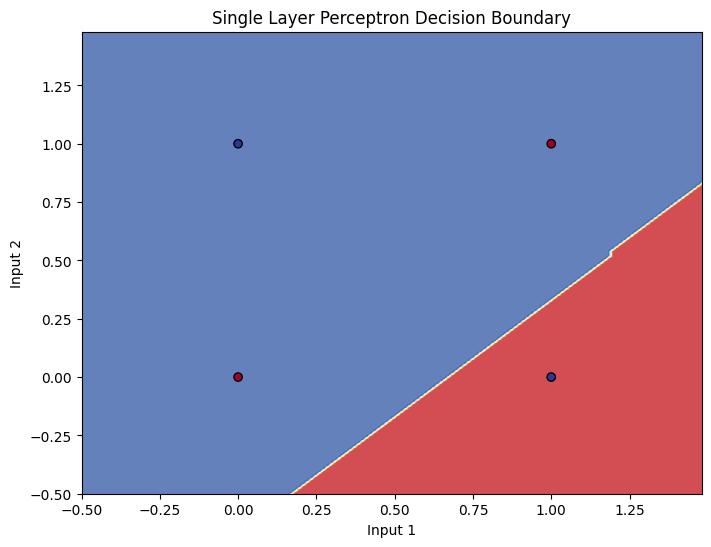

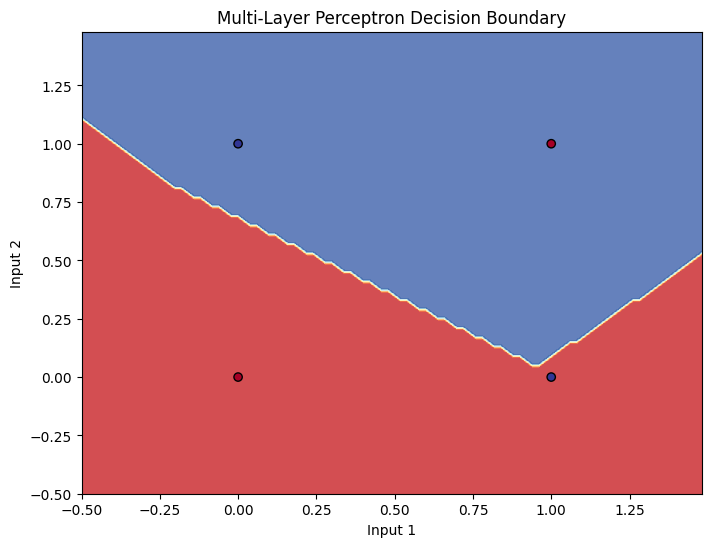

Single Layer Perceptron Results:
Input: [0 0], Target: 0, Prediction: 1
Input: [0 1], Target: 1, Prediction: 1
Input: [1 0], Target: 1, Prediction: 0
Input: [1 1], Target: 0, Prediction: 1

Multi-Layer Perceptron Results:
Input: [0 0], Target: 0, Prediction: 0
Input: [0 1], Target: 1, Prediction: 1
Input: [1 0], Target: 1, Prediction: 0
Input: [1 1], Target: 0, Prediction: 1


In [20]:
def plot_decision_boundary(classifier, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.title(title)
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

# Plot decision boundaries
plot_decision_boundary(slp, "Single Layer Perceptron Decision Boundary")
plot_decision_boundary(mlp, "Multi-Layer Perceptron Decision Boundary")

# Print predictions
print("Single Layer Perceptron Results:")
for inputs, label in zip(X, y):
    prediction = slp.predict(inputs)
    print(f"Input: {inputs}, Target: {label}, Prediction: {prediction}")

print("\nMulti-Layer Perceptron Results:")
predictions = mlp.predict(X)
for inputs, label, prediction in zip(X, y, predictions):
    print(f"Input: {inputs}, Target: {label}, Prediction: {prediction}")

### XOR Problem: Interpretation of SLP vs MLP Performance
Single Layer Perceptron (SLP)
The Single Layer Perceptron's performance on the XOR problem demonstrates the limitations of linear classifiers:

Failure to Classify: The SLP fails to correctly classify all four input combinations of the XOR gate.
Linear Separation Attempt: The SLP tries to separate the classes using a single straight line, which is impossible for the XOR problem.
Partial Success: It may correctly classify two out of four inputs, but cannot achieve 100% accuracy.
Visualization: The decision boundary plot for SLP shows a straight line that fails to properly separate the XOR input space.

This failure illustrates why the XOR problem became a significant challenge in the early days of neural network research.
Multi-Layer Perceptron (MLP)
The Multi-Layer Perceptron's performance showcases the power of adding hidden layers:

Successful Classification: The MLP correctly classifies all four input combinations of the XOR gate.
Non-linear Separation: By using a hidden layer, the MLP creates a non-linear decision boundary.
Complete Accuracy: It achieves 100% accuracy on the XOR problem.
Visualization: The decision boundary plot for MLP shows a curved line that successfully separates the XOR input space.

This success demonstrates how adding even a single hidden layer allows the network to solve non-linearly separable problems.